In [9]:
#Saturated Oxygen Data Correction
from oxyfloat import OxyFloat, RequiredVariableNotPresent, OpenDAPServerError

of = OxyFloat()

In [10]:
oga_floats = of.get_oxy_floats()

In [11]:
# Testing with a float that has data
oga_floats = ['1900650']
test_file = 'D1900650_137.nc'

In [12]:
for dac_url in of.get_dac_urls(oga_floats):
    for profile_url in of.get_profile_opendap_urls(dac_url):
        if test_file:
            if not profile_url.endswith(test_file):
                continue
        print 'Reading data from ...%s', profile_url[40:]
        try:
            d = of.get_profile_data(profile_url)
        except RequiredVariableNotPresent as e:
            print e
        except OpenDAPServerError as e:
            print e

Reading data from ...%s IOLIS-ARGO-GDAC-OBS/coriolis/1900650/profiles/D1900650_137.nc


In [13]:
# Demonstrate reading the data
print d.keys()
print d['p'][0]['long_name'] + ' (' + d['p'][0]['units'] + ')'
print d['p'][1][:10]
print d['o'][0]['long_name'] + ' (' + d['o'][0]['units'] + ')'
print d['o'][1][:10]

['lon', 'o', 'p', 's', 't', 'lat', 'dt']
SEA PRESSURE (decibar)
[  4.30000019   5.9000001    9.10000038  13.90000057  19.5         24.39999962
  29.5         34.5         39.59999847  44.59999847]
DISSOLVED OXYGEN (micromole/kg)
[ 206.49000549  206.38000488  206.30000305  206.8500061   206.86000061
  211.50999451  218.30999756  232.38000488  216.80000305  190.08000183]


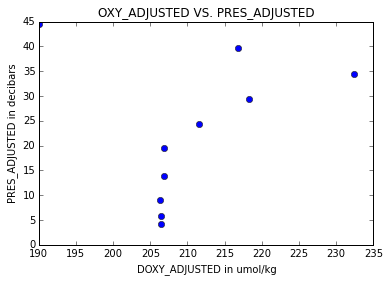

In [17]:
plot(d['o'][1][:10] , d['p'][1][:10] , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

The code below is form the old notebook. Some of it may be folded into oxyfloat functions.

In [ ]:
floatLookup = {}
for url in urls:
    print url
    ds = Dataset(url)
    floatNum = url.split('/')[9]
    print floatNum
    p,t,s,o = (ds.variables['PRES_ADJUSTED'][0][0], ds.variables['TEMP_ADJUSTED'][0][0], 
               ds.variables['PSAL_ADJUSTED'][0][0], ds.variables['DOXY_ADJUSTED'][0][0])
    lat,lon,mtime = (ds.variables['LATITUDE'][0], ds.variables['LONGITUDE'][0], ds.variables['JULD'][0])
    
    # Convert o from micromol/kg to ml/l 
    ##perc_sat = 100 * convertTomll(o) / satO2(s,t) 
    print s,t,perc_sat
    floatLookup[floatNum] = (p,t,s,o,lat,lon,mtime)

In [ ]:
floatLookup

In [ ]:
p,t,s,o = (ds.variables['PRES_ADJUSTED'][0][0], ds.variables['TEMP_ADJUSTED'][0][0], ds.variables['PSAL_ADJUSTED'][0][0], ds.variables['DOXY_ADJUSTED'][0][0])

In [ ]:
p,t,s,o

In [ ]:
lat,lon,mtime = (ds.variables['LATITUDE'][0], ds.variables['LONGITUDE'][0], ds.variables['JULD'][0])

In [ ]:
lat,lon,mtime

In [ ]:
oxygen arange(0. , 651. , 350.) #In umol/kg

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
oxygen = arange(0. , 651. , 50.) #In umol/kg
pressure = arange(0. , 13001. , 1000.) #In decibars

In [4]:
oxygen

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.])

In [5]:
pressure

array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
         7000.,   8000.,   9000.,  10000.,  11000.,  12000.,  13000.])

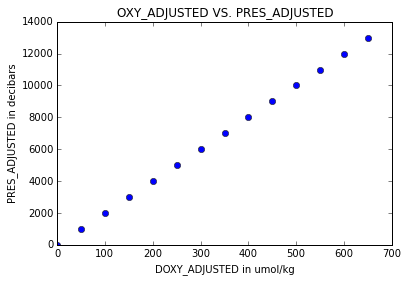

In [6]:
plot(oxygen , pressure , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

In [7]:
oxy = array([650. , 532.1 , 420.9 , 357.43 , 231.2 , 101.1 , 85.4])


pres = array([12000. , 8943.32 , 5421.8 , 4932.7 , 3547.19 , 2017.69 , 958.3])

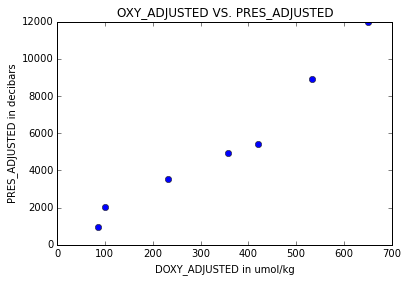

In [8]:
plot(oxy , pres , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')